# Laboratorio Instrumentos y Mediciones II
## Alumno:
### Fecha:

Importo las librerias necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np

Cargo el archivo de texto obtenido con Visual Analyzer

In [2]:
data = pd.read_csv('fft_sqr_1khz.txt',sep='\s+',header=None)
data = pd.DataFrame(data)

Gráfica de los datos para verificar que fueron cargados correctamente

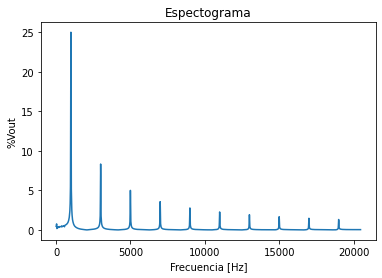

In [3]:
x = data[0]
y = data[1]
plt.plot(x, y)
plt.title('Espectograma')
plt.ylabel('%Vout')
plt.xlabel('Frecuencia [Hz]')
plt.show()

Busco y marco los máximos locales, también encuentro su magnitud para utilizarlos luego en la Serie de Fourier

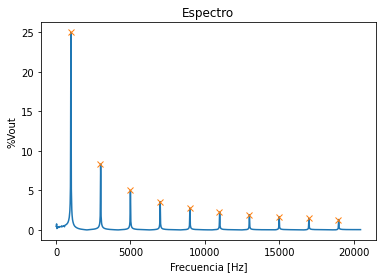

In [4]:
from matplotlib.ticker import EngFormatter
peaks, _ = find_peaks(y, height=1)
plt.plot(x,y)
plt.plot(10*peaks-10, y[peaks], "x")

plt.title('Espectro')
plt.ylabel('%Vout')
plt.xlabel('Frecuencia [Hz]')
plt.show()

Reconstrucción de la señal a partir de las componentes

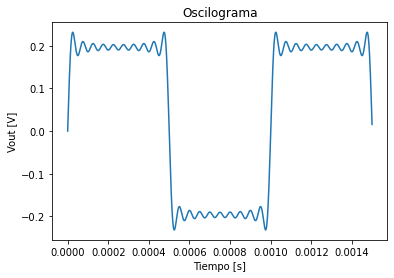

In [5]:
armonicos = len(peaks)
t=np.arange(0,1.5e-3,1e-6)
k=0.5
out = np.zeros_like(t)

for i in range(armonicos):
    out += y[peaks[i]]*np.sin((2*i+1)*t*1000*(2*np.pi))

out = out*k/(2*y[peaks[0]])

plt.plot(t,out)
plt.title('Oscilograma')
plt.ylabel('Vout [V]')
plt.xlabel('Tiempo [s]')
plt.show()

## Conclusión
Se puede reconstruir una señal a partir de la medición de sus componentes con un analizador de espectro. El software Visual Analyzer es una herramienta con una interfaz muy amigable, puede ser utilizado como osciloscopio, analizador de espectro y voltímetro de AC. A partir de los datos obtenidos se pudo exportar en formato de texto las mediciones y luego procesarlas con un script de Python para buscar las componentes armónicas de la señal y reconstruir a traves de una serie de Fourier la señal en el dominio del tiempo.